0.2964368293116737


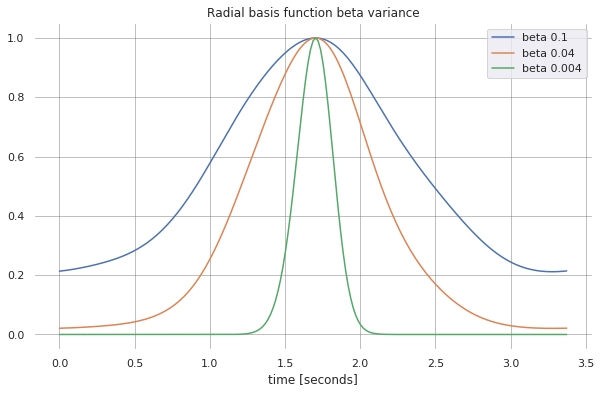

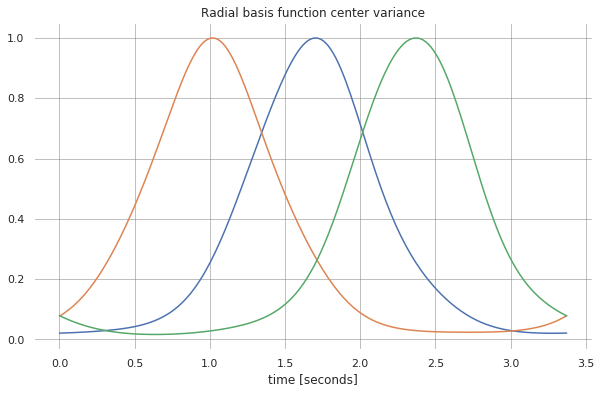

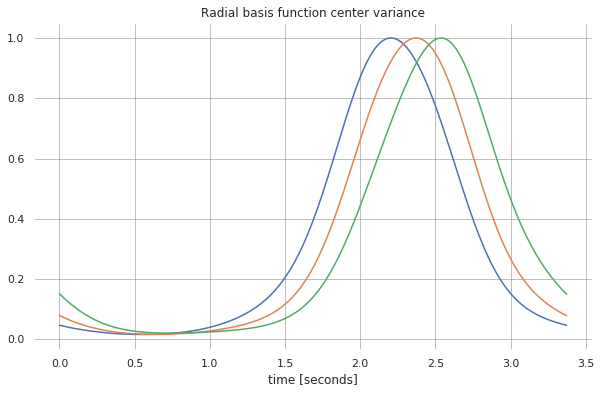

In [5]:
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import json
from glob import glob


# cpg

# SO(2) Parameters
phi   = 0.01*math.pi # SO(2) Frequency
alpha = 1.01         # SO(2) Alpha term
w11   = alpha*math.cos(phi)
w12   = alpha*math.sin(phi)
w21   =-w12
w22   = w11
x     = []
y     = []
t     = []

t.append(0)
x.append(-0.197)
y.append(0.0)

# Run for one period
period = 0
while y[period] >= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(np.tanh(w11*x[period-1]+w12*y[period-1]));
    y.append(np.tanh(w22*y[period-1]+w21*x[period-1]));
    
while y[period] <= y[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(np.tanh(w11*x[period-1]+w12*y[period-1]));
    y.append(np.tanh(w22*y[period-1]+w21*x[period-1]));    
   
# We set period a bit less
print(1/(period*0.0167))
period = period

# RBFN Parameters
nc = 20;     # Number of kernels
W  = [0]*nc; # Weights 
s  = 0.04;   # Kernel variance
KENNE  = [0]*nc  # Kernels

ci = np.asarray(np.around(np.linspace(1, period, nc+1)), dtype=int)

ci = ci[:-1]

cx = [0] * (len(ci))
cy = [0] * (len(ci))
cxy = [0] * (len(ci))

xy = x+y

for k in range(len(ci)):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]

#for i in range(nc):
#    rx   = [q - cx[i] for q in x]
#    ry   = [q - cy[i] for q in y]
#    KENNE[i] = np.exp(-(np.power((rx),2) + np.power((ry),2))/s)
    
rx   = [q - cx[10] for q in x]
ry   = [q - cy[10] for q in y]
kernal1 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)
kernal2 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.1)
kernal3 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.004)

#for i in range(nc):
#    ax=sns.lineplot(t, KENNE[i])

#ax.lines[10].set_linestyle(":")
#ax.lines[10].set_linewidth(8)

plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("white")
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.plot(t, kernal2, label="beta 0.1")
plt.plot(t, kernal1, label="beta 0.04")
plt.plot(t, kernal3, label="beta 0.004")
plt.title('Radial basis function beta variance')
plt.xlabel('time [seconds]')
plt.legend()
plt.show()


rx   = [q - cx[10] for q in x]
ry   = [q - cy[10] for q in y]

kernal1 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)
rx   = [q - cx[6] for q in x]
ry   = [q - cy[6] for q in y]
kernal2 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)

rx   = [q - cx[14] for q in x]
ry   = [q - cy[14] for q in y]

kernal3 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)

plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("white")
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.plot(t, kernal1)
plt.plot(t, kernal2)
plt.plot(t, kernal3)
plt.title('Radial basis function center variance')
plt.xlabel('time [seconds]')
plt.show()


rx   = [q - cx[13] for q in x]
ry   = [q - cy[13] for q in y]

kernal1 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)
rx   = [q - cx[14] for q in x]
ry   = [q - cy[14] for q in y]
kernal2 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)

rx   = [q - cx[15] for q in x]
ry   = [q - cy[15] for q in y]

kernal3 = np.exp(-(np.power((rx),2) + np.power((ry),2))/0.04)


plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("white")
ax.grid(color='gray', linestyle='-', linewidth=0.5)
plt.plot(t, kernal1)
plt.plot(t, kernal2)
plt.plot(t, kernal3)
plt.title('Radial basis function center variance')
plt.xlabel('time [seconds]')
plt.show()